## Group by windows

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

%matplotlib inline

## Part 1 : Data observation and cleaning

In [2]:
df = pd.read_csv("dataset.csv")
df.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
count,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000,162702.000000
mean,0.000009,0.000011,0.000031,0.000005,0.000016,-0.000005,-0.000002,0.000003,-0.000021,0.000026,0.000030
std,0.999950,0.999925,0.999961,0.999925,0.999963,0.999926,0.999950,0.999949,0.997770,0.999686,0.999847
min,-3.211980,-3.395387,-3.325651,-3.378450,-3.281286,-4.200181,-3.898025,-3.524957,-13.704556,-12.044778,-3.183571
25%,-0.678808,-0.482716,-0.629123,-0.491585,-0.612334,-0.559023,-0.606135,-0.736398,-0.593096,-0.498480,-0.658530
50%,0.041883,0.180360,0.041442,0.147397,0.117040,0.153972,0.186038,-0.012354,-0.034882,-0.257635,-0.015437
75%,0.743973,0.656920,0.659246,0.636887,0.712393,0.685353,0.718237,0.802395,0.508232,0.359773,0.636740
max,5.013899,6.260782,8.652950,8.359670,6.424227,5.638259,3.735957,4.667058,8.203706,5.597387,9.204384


In [3]:
df_windows_median = df.groupby('day_cycle_window').median()
df_windows_std = df.groupby('day_cycle_window').std()

In [4]:
col_med = []
col_std = []
for i in df_windows_median.columns:
    col_med.append(i + '_med')
    col_std.append(i + '_std')
df_windows_median.columns = col_med
df_windows_std.columns = col_std

In [5]:
df_windows_std.head()

,p1_std,p2_std,p3_std,p4_std,p5_std,p6_std,p7_std,p8_std,p9_std,p10_std,p11_std
day_cycle_window,,,,,,,,,,,
1_1_1,0.591155,0.739638,0.661250,0.631763,0.688777,0.741959,0.666670,0.771232,0.246201,0.673869,0.724468
1_1_10,0.245958,0.242592,0.230089,0.206792,0.159972,0.263903,0.235525,0.268986,0.000000,0.007340,0.211292
1_1_11,0.133627,0.132878,0.123037,0.118335,0.100332,0.148944,0.130108,0.155183,0.000000,0.007835,0.121043
1_1_12,0.089126,0.077160,0.074458,0.079167,0.084962,0.095682,0.085289,0.105400,0.000000,0.008146,0.068842
1_1_13,0.006691,0.004849,0.003302,0.007130,0.014593,0.007426,0.008084,0.010889,0.000000,0.008337,0.005184


In [6]:
day_cycle_window = df['day_cycle_window']
df_tot = pd.concat([df_windows_median, df_windows_std], axis=1, sort=False)

In [7]:
df_tot.head()

,p1_med,p2_med,p3_med,p4_med,p5_med,p6_med,p7_med,p8_med,p9_med,p10_med,...,p2_std,p3_std,p4_std,p5_std,p6_std,p7_std,p8_std,p9_std,p10_std,p11_std
day_cycle_window,,,,,,,,,,,,,,,,,,,,,
1_1_1,-1.849016,-2.565392,-2.688768,-2.672632,-2.454134,-1.828161,-2.523478,-0.806149,2.697076,-1.748105,...,0.739638,0.661250,0.631763,0.688777,0.741959,0.666670,0.771232,0.246201,0.673869,0.724468
1_1_10,1.118294,1.037859,0.993861,1.048020,1.110727,1.158973,1.136662,1.223982,-0.429810,-0.088966,...,0.242592,0.230089,0.206792,0.159972,0.263903,0.235525,0.268986,0.000000,0.007340,0.211292
1_1_11,0.800962,0.751052,0.732940,0.791591,0.801123,0.790778,0.804256,0.849297,-0.429810,-0.092606,...,0.132878,0.123037,0.118335,0.100332,0.148944,0.130108,0.155183,0.000000,0.007835,0.121043
1_1_12,0.290764,0.280503,0.281363,0.334924,0.377143,0.242257,0.311893,0.253519,-0.429810,-0.084409,...,0.077160,0.074458,0.079167,0.084962,0.095682,0.085289,0.105400,0.000000,0.008146,0.068842
1_1_13,0.137776,0.150402,0.160487,0.198811,0.222704,0.083085,0.168788,0.070739,-0.429810,-0.092606,...,0.004849,0.003302,0.007130,0.014593,0.007426,0.008084,0.010889,0.000000,0.008337,0.005184


In [241]:
df_windows_mean = df.groupby('day_cycle_window').mean()

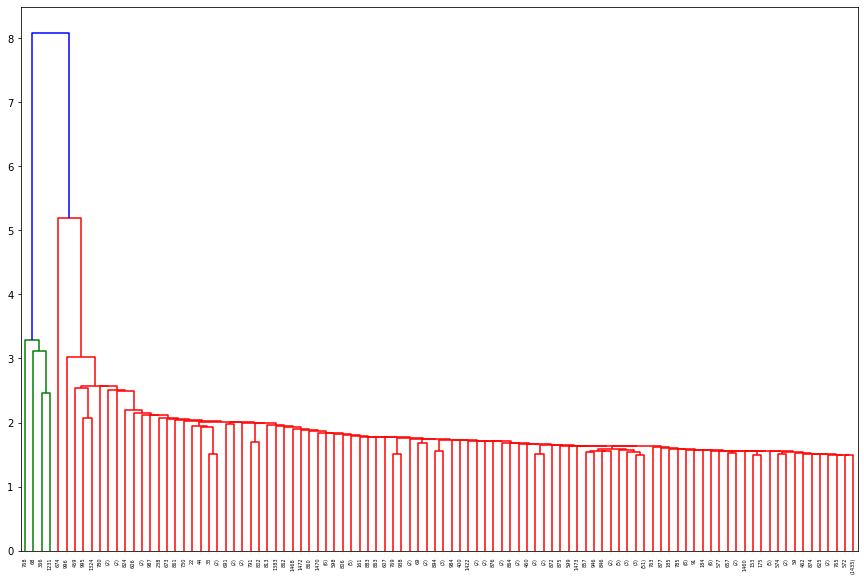

In [242]:
hierarchy_clusters = linkage(df_windows_mean)
plt.figure(figsize=(15, 10))
dendrogram(hierarchy_clusters, p=100, truncate_mode='lastp')
plt.show()

In [226]:
#### On décide de faire 3 classes au vu du dendrogramme ####

kmeans = KMeans(n_clusters=3).fit(df_windows_mean)
df_windows_mean_cluster_1 = df_windows_mean[kmeans.labels_==0]
df_windows_mean_cluster_2 = df_windows_mean[kmeans.labels_==1]
df_windows_mean_cluster_3 = df_windows_mean[kmeans.labels_==2]

## Part 2: Classification

Nous utiliserons comme classifiers: 
- Elliptic Enveloppe, qui nous permettra d'éloigner les valeurs s'éloignant d'une répartition gaussienne des données
- Isolation Forest, pour éviter le swamping et le masking
- LOF, qui nous permettra aussi de trouver de trouver les points proches de clusters denses (locality aspect)

In [8]:
def plotAnomalyScore2D_bis(df, clf_name, clf, f1,f2):
    """
        Same as plotAnomalyScore2D, but with a classifier trained on the whole dataset
        - df: Pandas DataFrame containing all the points to plot (for features X1 and X2)
        - clf_name: String value - name of the outlier detection model
        - clf: Scikit Learn model instance - the trained outlier detection model
    """
    if clf_name == 'LOF':
        score = clf.negative_outlier_factor_
    else:
        score = clf.decision_function(df)
    
    plt.figure()
    sc = plt.scatter(x=df[f1],y=df[f2], c=-score, cmap='Reds')
    plt.colorbar(sc, label='anomaly score')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.title(clf_name)

In [9]:
isf = IsolationForest(behaviour='new', n_estimators=100, contamination=0.15)
isf.fit(df_tot)

lof = LocalOutlierFactor(n_neighbors=5, contamination=0.15, novelty = False)
lof.fit(df_tot)

cov = EllipticEnvelope(random_state=0)
cov.fit(df_tot)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=0,
                 store_precision=True, support_fraction=None)

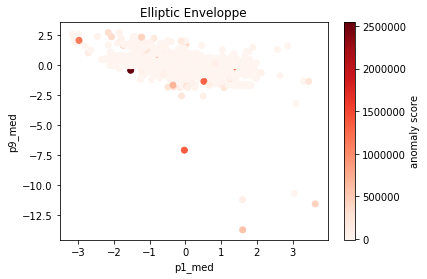

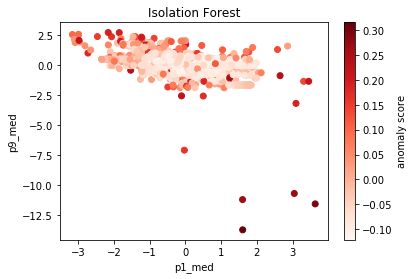

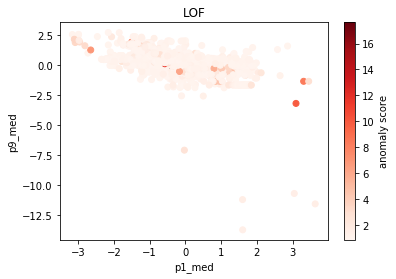

In [10]:
plotAnomalyScore2D_bis(df_tot, 'Elliptic Enveloppe', cov, 'p1_med','p9_med')
plotAnomalyScore2D_bis(df_tot, 'Isolation Forest', isf, 'p1_med','p9_med')
plotAnomalyScore2D_bis(df_tot, 'LOF', lof, 'p1_med','p9_med')

In [36]:
#anomaly_lof = lof.predict(df_tot)
#anomaly_cov = cov.predict(df_tot)
#anomaly_isf = isf.predict(df_tot)
#anomaly = (anomaly_cov+anomaly_isf == -1).astype(int) # +anomaly_lof

In [42]:
#anomaly.sum()

In [43]:
#df2 = df_tot.copy()
#df2['anomaly']=anomaly
#outliers_per_column = df2['anomaly'].sort_values(ascending = False)
#outliers_per_column[:8]

In [44]:
#plt.plot(outliers_per_column[:800])

In [11]:
lof_score = lof.negative_outlier_factor_
isf_score = isf.decision_function(df_tot)
cov_score = cov.decision_function(df_tot)

In [12]:
scaler = StandardScaler()
scaler.fit(lof_score.reshape(-1, 1))
lof_score_n = scaler.transform(lof_score.reshape(-1, 1))
scaler = StandardScaler()
scaler.fit(isf_score.reshape(-1, 1))
isf_score_n = scaler.transform(isf_score.reshape(-1, 1))
scaler = StandardScaler()
scaler.fit(cov_score.reshape(-1, 1))
cov_score_n = scaler.transform(cov_score.reshape(-1, 1))

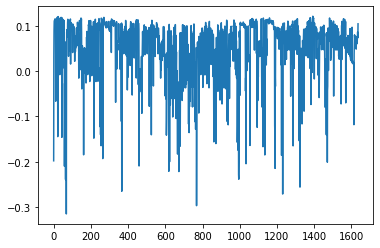

In [26]:
plt.plot(isf_score)

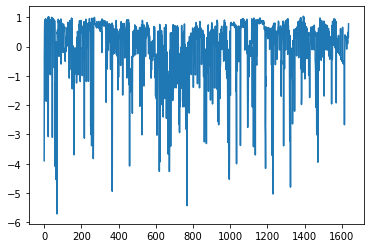

In [44]:
plt.plot(isf_score_n)

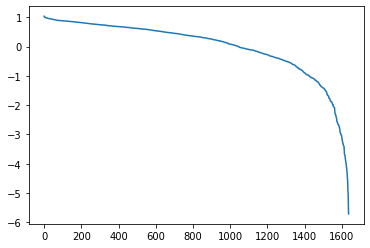

In [51]:
plt.plot(-np.sort(-isf_score_n, axis=None))

In [13]:
cov_score_n.reshape(1, -1)

array([[-0.31097205,  0.14099179,  0.1412819 , ...,  0.14113569,
        -0.13761063,  0.14121479]])

In [14]:
anomaly_score = cov_score_n.reshape(1, -1)[0] + isf_score_n.reshape(1, -1)[0] + lof_score_n.reshape(1, -1)[0] 

In [15]:
len(anomaly_score)

1637

In [16]:
df_tot['anomaly_score'] = anomaly_score

In [17]:
outliers_per_column = df_tot['anomaly_score'].sort_values(ascending = False)
outliers_per_column[:8]

day_cycle_window
4_2_82    1.508482
4_2_69    1.497907
4_2_83    1.479864
4_2_68    1.478703
4_2_70    1.477532
4_2_84    1.473745
1_1_21    1.470088
4_2_86    1.453764
Name: anomaly_score, dtype: float64

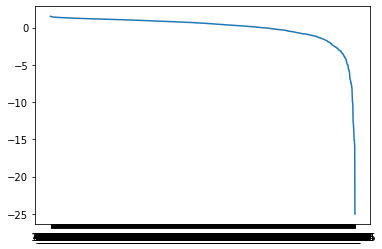

In [18]:
plt.plot(outliers_per_column)